In [1]:
#clear your memory
rm(list = ls())

In [2]:
library(readr)
library(dplyr)
library(car)
library(Hmisc)
library(tseries)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
data <- read_csv("TRAFFIC2.csv")


── Column specification ─────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




In [4]:
head(data)

year,totacc,fatacc,injacc,pdoacc,ntotacc,nfatacc,ninjacc,npdoacc,rtotacc,⋯,lrfatacc,lntotacc,lnfatacc,prcnfat,lushigh,lcntyrds,lstrtes,spdt,beltt,prcfat_1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1981,40511,365,15626,24520,38235,323,14743,23169,236,⋯,2.484907,10.55151,5.777652,0.8447757,6.963190,8.830251,8.153062,0,0,NA
1981,36034,329,14469,21236,33989,294,13620,20075,200,⋯,2.079442,10.43379,5.683580,0.8649857,6.839477,8.708970,8.046550,0,0,0.9009899
1981,40328,369,16026,23933,37990,335,15105,22550,253,⋯,2.484907,10.54508,5.814130,0.8818110,7.041412,8.825119,8.148446,0,0,0.9130266
1981,37699,369,15560,21770,35457,326,14654,20477,270,⋯,2.639057,10.47608,5.786897,0.9194235,6.916715,8.750524,8.071531,0,0,0.9149970
1981,38816,355,16546,21915,36611,321,15569,20721,263,⋯,1.791759,10.50810,5.771441,0.8767856,6.986567,8.816705,8.111928,0,0,0.9788058
1981,38900,422,16778,21700,36555,376,15747,20432,290,⋯,2.772589,10.50657,5.929589,1.0285871,6.931472,8.805076,8.171317,0,0,0.9145713


In [5]:
summary(data)

      year          totacc          fatacc          injacc          pdoacc     
 Min.   :1981   Min.   :32699   Min.   :266.0   Min.   :13268   Min.   :19162  
 1st Qu.:1983   1st Qu.:38847   1st Qu.:345.0   1st Qu.:16302   1st Qu.:22010  
 Median :1985   Median :42864   Median :370.0   Median :17770   Median :24878  
 Mean   :1985   Mean   :42831   Mean   :377.9   Mean   :17861   Mean   :24592  
 3rd Qu.:1987   3rd Qu.:46868   3rd Qu.:405.0   3rd Qu.:19613   3rd Qu.:26720  
 Max.   :1989   Max.   :52971   Max.   :500.0   Max.   :21741   Max.   :31425  
                                                                               
    ntotacc         nfatacc         ninjacc         npdoacc     
 Min.   :30759   Min.   :237.0   Min.   :12492   Min.   :18030  
 1st Qu.:36274   1st Qu.:305.8   1st Qu.:15301   1st Qu.:20582  
 Median :39541   Median :333.0   Median :16490   Median :22926  
 Mean   :39523   Mean   :335.3   Mean   :16579   Mean   :22609  
 3rd Qu.:42645   3rd Qu.:363.0   3r

# (a)

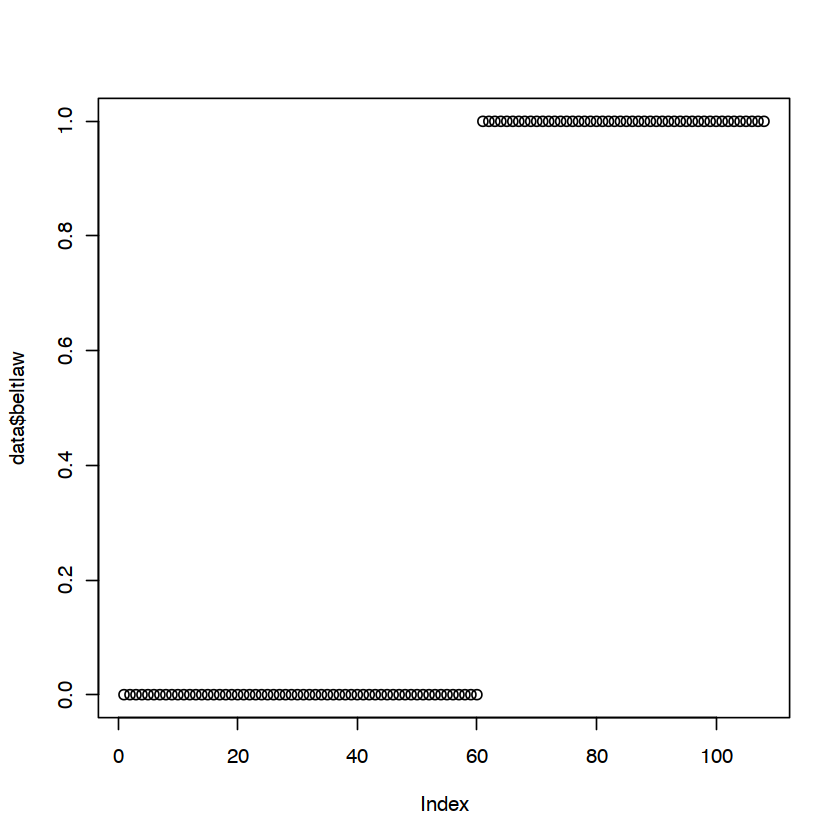

In [6]:
plot(data$beltlaw)

In [7]:
data[60:61,c('year','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec', 'beltlaw')]

year,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,beltlaw
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985,0,0,0,0,0,0,0,0,0,0,1,0
1986,0,0,0,0,0,0,0,0,0,0,0,1


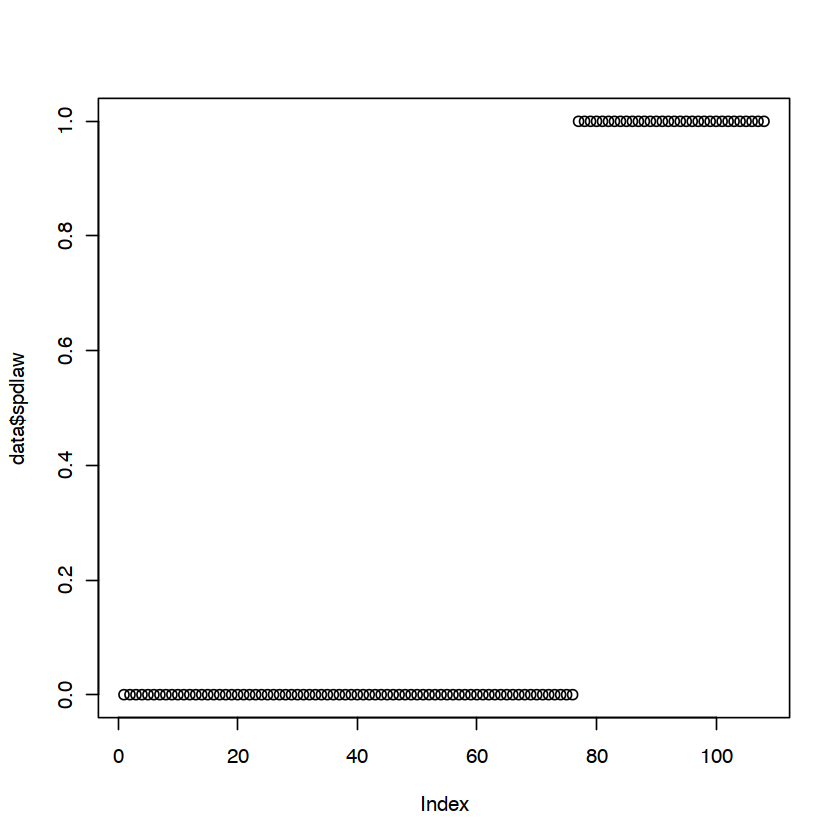

In [8]:
plot(data$spdlaw)

In [9]:
data[76:77,c('year','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec', 'spdlaw')]

year,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,spdlaw
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1987,0,0,1,0,0,0,0,0,0,0,0,0
1987,0,0,0,1,0,0,0,0,0,0,0,1


# (b)

In [10]:
M_b = lm(ltotacc ~ t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec, data=data)

summary(M_b)


Call:
lm(formula = ltotacc ~ t + feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.100216 -0.039779 -0.002915  0.038747  0.138015 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.4685665  0.0190028 550.895  < 2e-16 ***
t            0.0027471  0.0001611  17.057  < 2e-16 ***
feb         -0.0426863  0.0244475  -1.746 0.084036 .  
mar          0.0798244  0.0244491   3.265 0.001523 ** 
apr          0.0184849  0.0244517   0.756 0.451535    
may          0.0320980  0.0244554   1.313 0.192510    
jun          0.0201917  0.0244602   0.825 0.411162    
jul          0.0375825  0.0244660   1.536 0.127835    
aug          0.0539829  0.0244729   2.206 0.029808 *  
sep          0.0423609  0.0244809   1.730 0.086812 .  
oct          0.0821134  0.0244899   3.353 0.001149 ** 
nov          0.0712786  0.0244999   2.909 0.004511 ** 
dec          0.0961571  0.0245111   3.9

# (c)

In [11]:
M_c = lm(ltotacc ~ t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw, data=data)

summary(M_c)


Call:
lm(formula = ltotacc ~ t + feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw, 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.084489 -0.023998 -0.002177  0.024585  0.089315 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.6398622  0.0630860 168.657  < 2e-16 ***
t            0.0011011  0.0002579   4.270 4.79e-05 ***
feb         -0.0338345  0.0177683  -1.904  0.06004 .  
mar          0.0769529  0.0167941   4.582 1.46e-05 ***
apr          0.0104562  0.0170469   0.613  0.54116    
may          0.0237073  0.0169389   1.400  0.16504    
jun          0.0219333  0.0172149   1.274  0.20588    
jul          0.0499292  0.0167036   2.989  0.00360 ** 
aug          0.0559524  0.0168173   3.327  0.00127 ** 
sep          0.0420692  0.0172819   2.434  0.01687 *  
oct          0.0817171  0.0169554   4.820 5.73e-06 ***
nov          0.0768723  0.0172455   4.458 2.36e-05 ***

# (e)

In [12]:
summary(data$prcfat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7017  0.8229  0.8781  0.8856  0.9463  1.2168 

In [13]:
sd(data$prcfat)

[1] 0.0997777

# (f)

In [14]:
M_f = lm(prcfat ~ t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw, data=data)

summary(M_f)


Call:
lm(formula = prcfat ~ t + feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw, 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.132085 -0.032573  0.000621  0.038226  0.132080 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.030e+00  1.030e-01  10.003 2.52e-16 ***
t           -2.235e-03  4.208e-04  -5.312 7.66e-07 ***
feb          8.607e-04  2.900e-02   0.030 0.976384    
mar          9.226e-05  2.741e-02   0.003 0.997321    
apr          5.822e-02  2.782e-02   2.093 0.039152 *  
may          7.164e-02  2.764e-02   2.592 0.011129 *  
jun          1.013e-01  2.809e-02   3.604 0.000510 ***
jul          1.766e-01  2.726e-02   6.479 4.64e-09 ***
aug          1.926e-01  2.744e-02   7.018 3.91e-10 ***
sep          1.600e-01  2.820e-02   5.674 1.64e-07 ***
oct          1.010e-01  2.767e-02   3.651 0.000435 ***
nov          1.395e-02  2.814e-02   0.496 0.621345    


# (g)

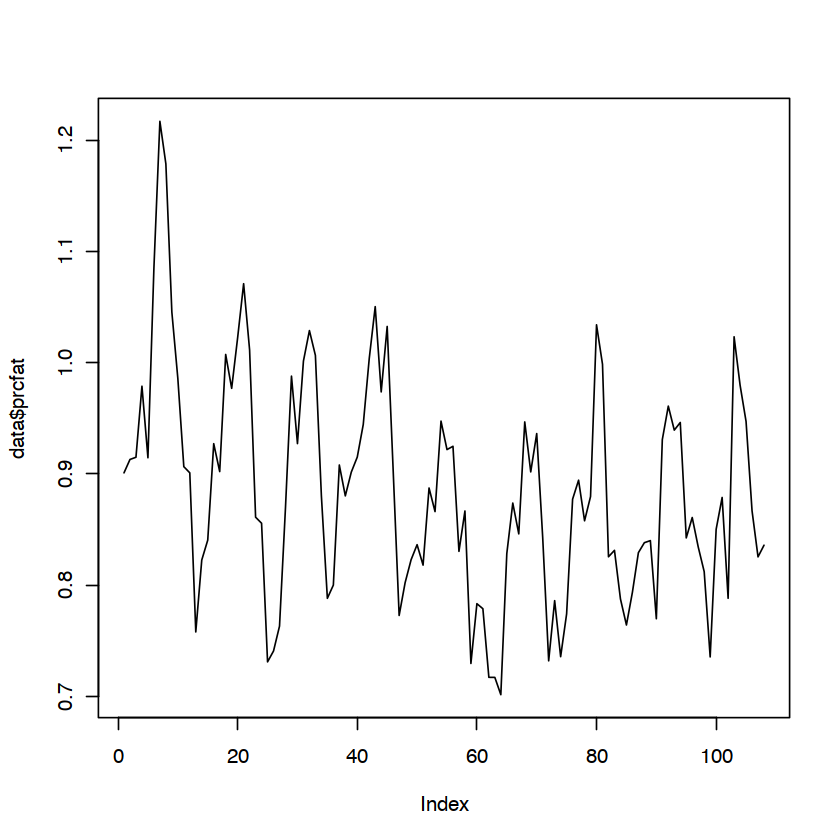

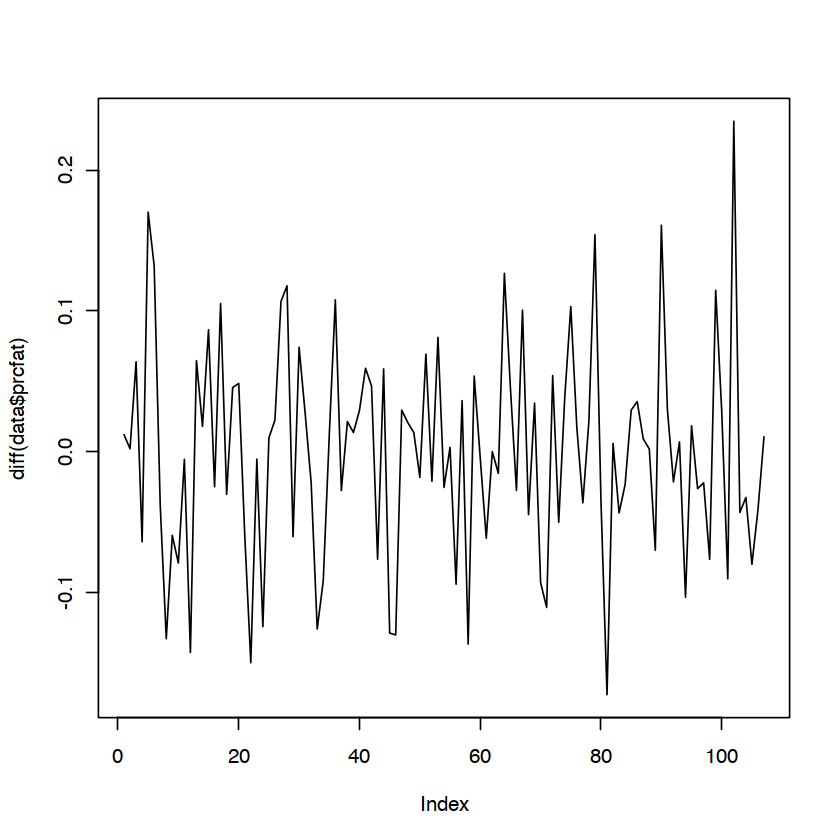

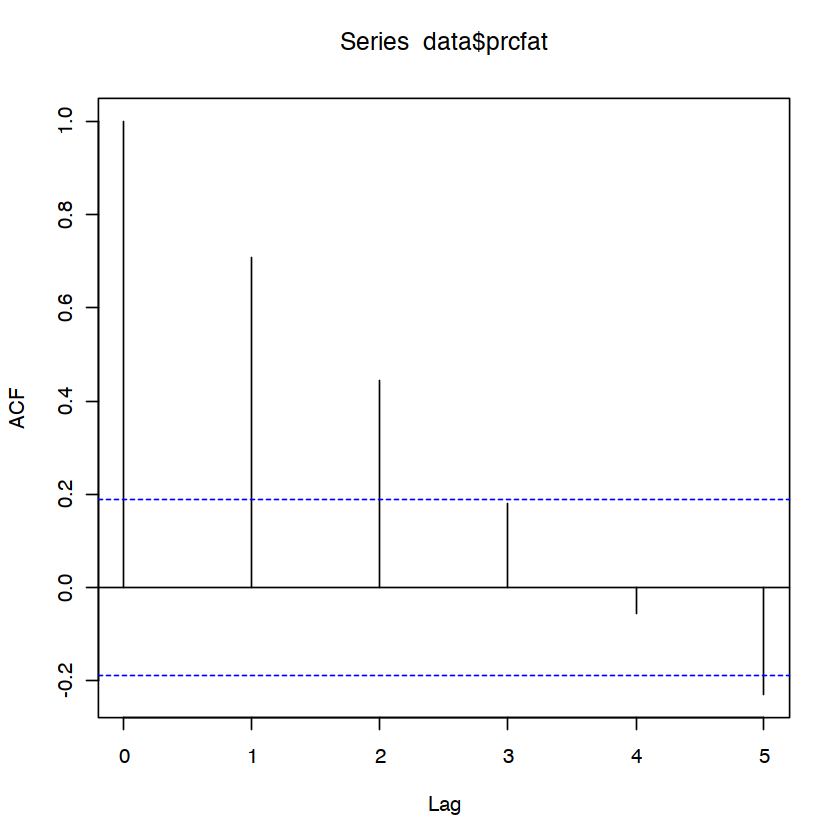

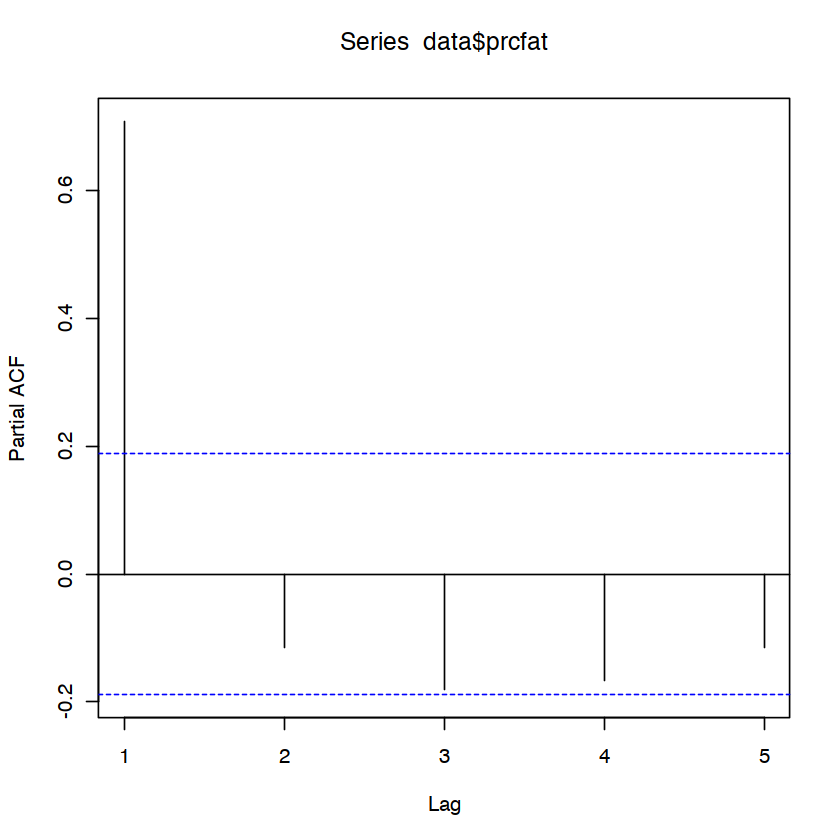

In [15]:
plot(data$prcfat,type="l")
plot(diff(data$prcfat),type="l")
acf(data$prcfat, lag.max = 5)
pacf(data$prcfat, lag.max = 5)

In [16]:
adf.test(data$prcfat)

Warning message in adf.test(data$prcfat):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data$prcfat
Dickey-Fuller = -6.149, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


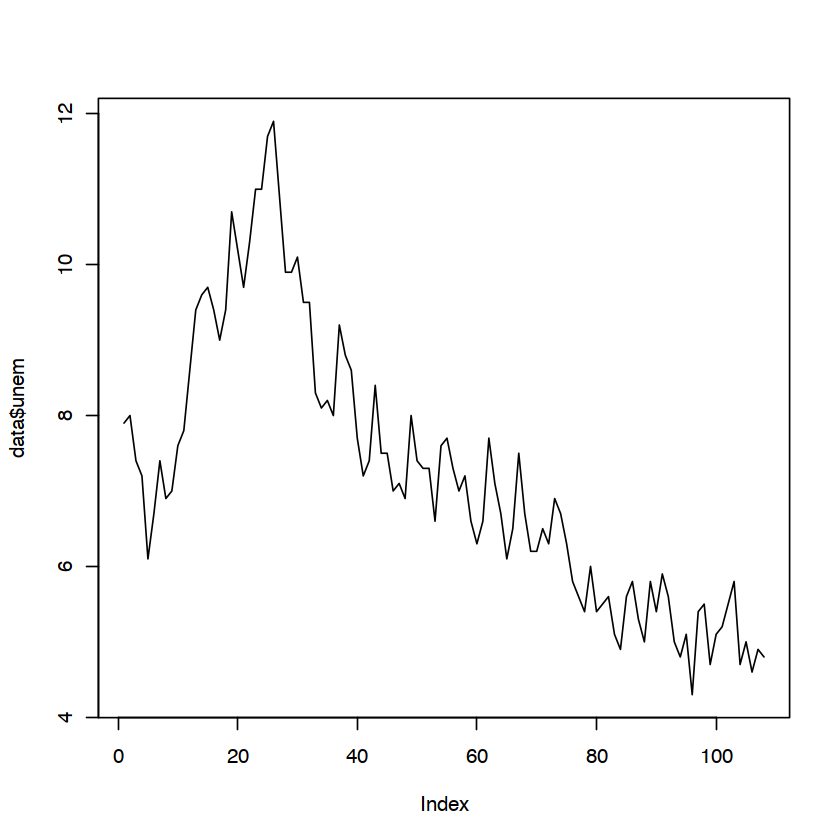

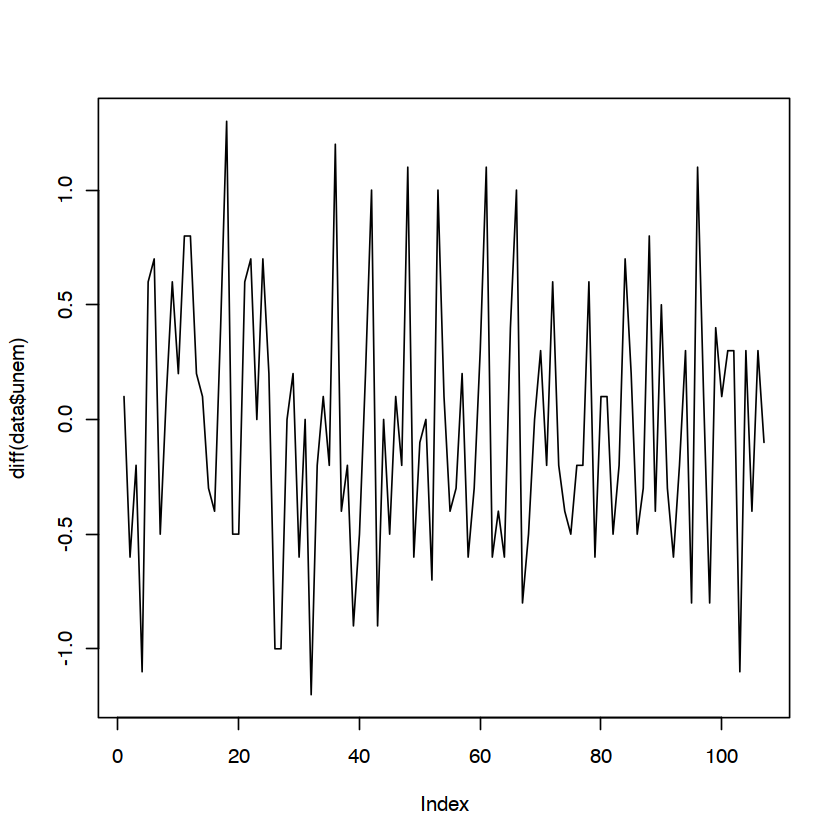

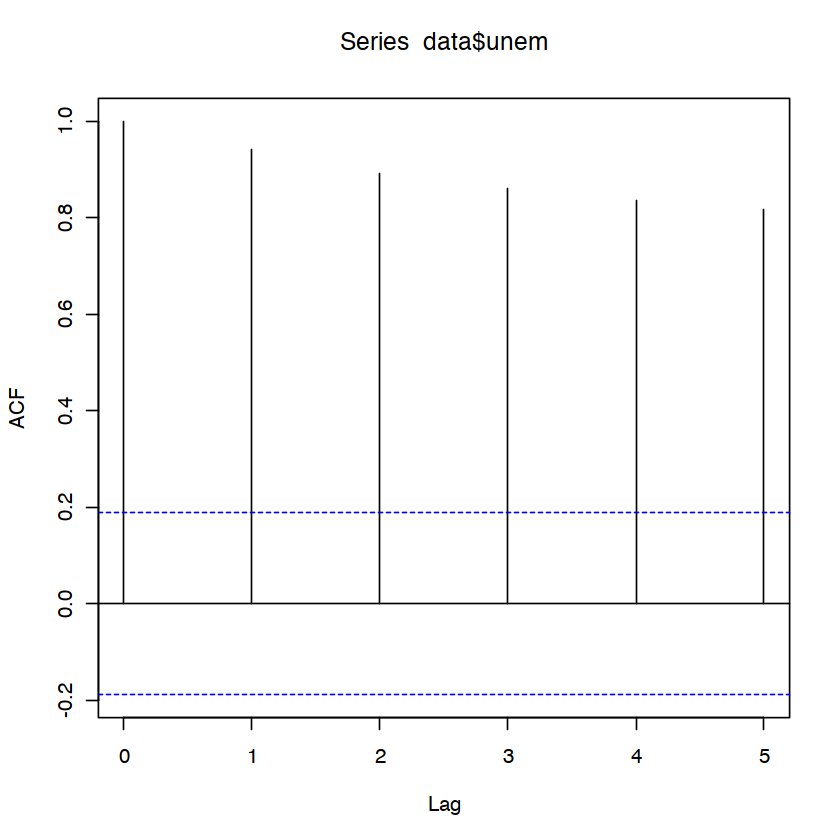

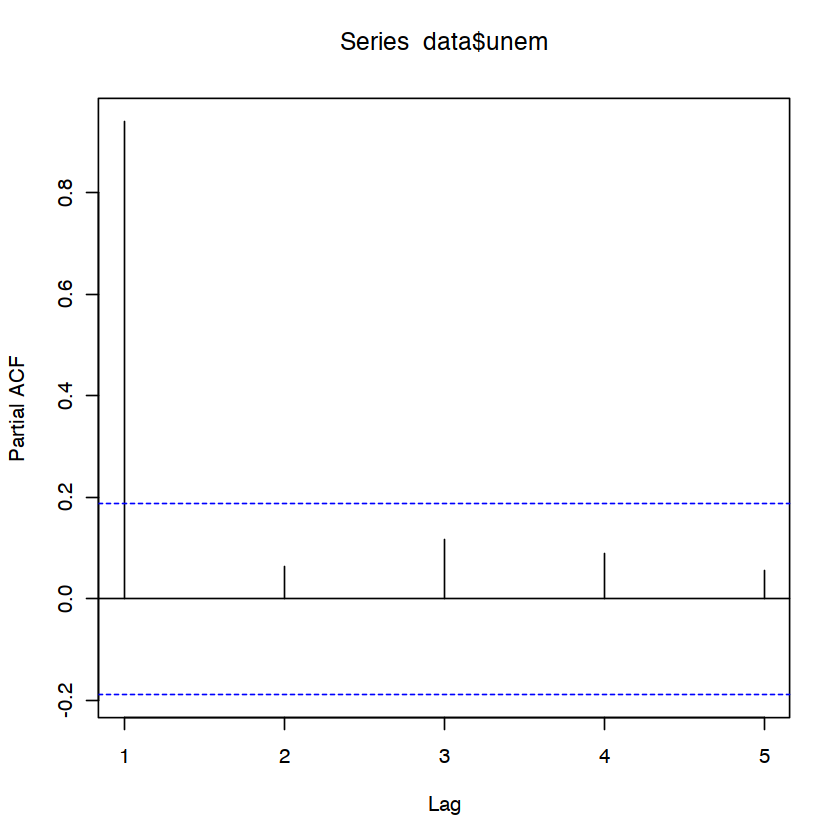

In [17]:
plot(data$unem,type="l")
plot(diff(data$unem),type="l")
acf(data$unem, lag.max = 5)
pacf(data$unem, lag.max = 5)

In [18]:
adf.test(data$unem)


	Augmented Dickey-Fuller Test

data:  data$unem
Dickey-Fuller = -3.2, Lag order = 4, p-value = 0.0915
alternative hypothesis: stationary


# (h)

In [19]:
data$prcfat_D1 = c(NA, diff(data$prcfat))
data$unem_D1 = c(NA, diff(data$unem))

M_h = lm(prcfat_D1 ~ t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem_D1 + spdlaw + beltlaw, data=data)

summary(M_h)


Call:
lm(formula = prcfat_D1 ~ t + feb + mar + apr + may + jun + jul + 
    aug + sep + oct + nov + dec + wkends + unem_D1 + spdlaw + 
    beltlaw, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.130088 -0.044411  0.002195  0.032828  0.166415 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.1268680  0.1048114  -1.210  0.22928   
t            0.0001433  0.0004849   0.296  0.76823   
feb          0.0346228  0.0370460   0.935  0.35250   
mar          0.0419346  0.0389248   1.077  0.28422   
apr          0.0985703  0.0382988   2.574  0.01170 * 
may          0.0568102  0.0374416   1.517  0.13270   
jun          0.0540339  0.0347738   1.554  0.12373   
jul          0.0878394  0.0331103   2.653  0.00943 **
aug          0.0589255  0.0396686   1.485  0.14092   
sep          0.0065431  0.0379741   0.172  0.86358   
oct         -0.0323897  0.0352025  -0.920  0.35998   
nov         -0.0591083  0.0354151  -1.669  0.09859 . 
dec    